In [ ]:
!pip install statsmodels

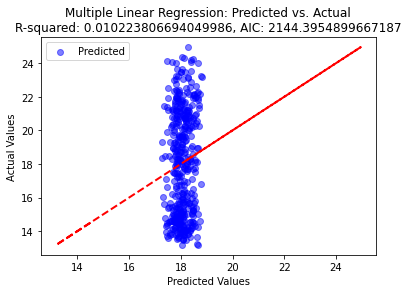

In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path

# Specify the path to the directory containing MLR_INPUT.csv
path_to_files = 'C:/Users/Subhadeep Maishal/Music/JUP/test_data/'

# Read only up to 421 rows from MLR_INPUT.csv
mlr_data = pd.read_csv(Path(path_to_files) / 'MLR_INPUT.csv', nrows=421)

# Set 'PREDICT_IITKGP_WITH_MLR' as the dependent variable (Y)
Y = mlr_data['PREDICT_IITKGP_WITH_MLR']

# Set columns 12 and onwards as independent variables (X)
X = mlr_data.iloc[:, 12:]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Extract additional statistics
r_squared = model.rsquared
aic = model.aic

# Plot the predicted vs. actual values with different colors
plt.scatter(model.fittedvalues, Y, alpha=0.5, label='Predicted', color='blue')
plt.plot(Y, Y, color='red', linestyle='--', linewidth=2)
plt.title(f'Multiple Linear Regression: Predicted vs. Actual\nR-squared: {r_squared}, AIC: {aic}')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()


C:\Users\Subhadeep Maishal\AppData\Roaming\Python\Python39\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

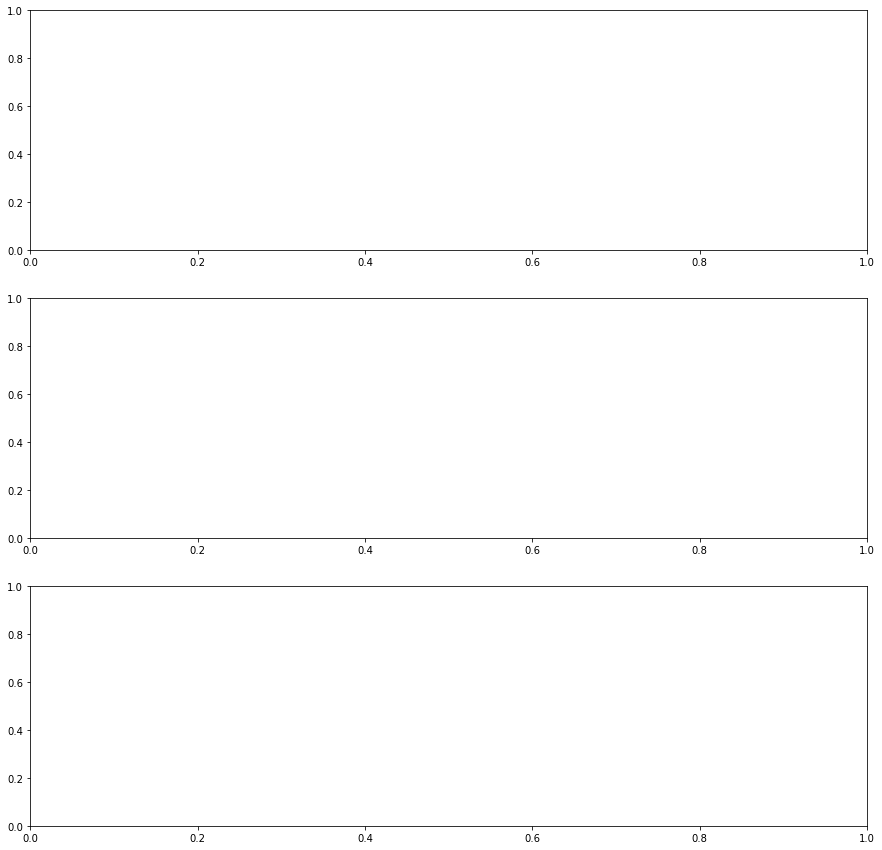

In [29]:
# Fit the Linear Regression model
linear_model = sm.OLS(Y, X).fit()

# Fit the Poisson Regression model
poisson_model = sm.GLM(Y, X, family=sm.families.Poisson()).fit()

# Fit the Negative Binomial Regression model
negbin_model = sm.GLM(Y, X, family=sm.families.NegativeBinomial()).fit()

# Extract additional statistics
linear_r_squared = linear_model.rsquared
linear_aic = linear_model.aic

poisson_r_squared = poisson_model.deviance
poisson_aic = poisson_model.aic

negbin_r_squared = negbin_model.deviance
negbin_aic = negbin_model.aic

# Create a 3x3 subplot for each model's predicted vs. actual values
fig, axes = plt.subplots(3, figsize=(15, 15))

# Linear Regression subplot
axes[0, 0].scatter(linear_model.fittedvalues, Y, alpha=0.5, label='Predicted', color='blue')
axes[0, 0].scatter(Y, Y, label='Actual', color='red', marker='x')
axes[0, 0].set_title(f'Linear Regression\nR-squared: {linear_r_squared}, AIC: {linear_aic}')

# Poisson Regression subplot
axes[0, 1].scatter(poisson_model.fittedvalues, Y, alpha=0.5, label='Predicted', color='green')
axes[0, 1].scatter(Y, Y, label='Actual', color='red', marker='x')
axes[0, 1].set_title(f'Poisson Regression\nDeviance: {poisson_r_squared}, AIC: {poisson_aic}')

# Negative Binomial Regression subplot
axes[0, 2].scatter(negbin_model.fittedvalues, Y, alpha=0.5, label='Predicted', color='purple')
axes[0, 2].scatter(Y, Y, label='Actual', color='red', marker='x')
axes[0, 2].set_title(f'Negative Binomial Regression\nDeviance: {negbin_r_squared}, AIC: {negbin_aic}')

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.legend()

plt.tight_layout()
plt.show()